In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image





In [2]:
# Load training data
X_train = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv", header=None)
y_train = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv", header=None)

# Load testing data
X_test = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv", header=None)
y_test = pd.read_csv("Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv", header=None)

# Print shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 1)


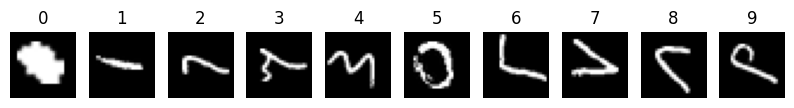

In [3]:
# Plotting first 10 digits from training set

plt.figure(figsize=(10, 2))
for i in range(10):
    image = X_train.iloc[i].values.reshape(28, 28)   
    label = y_train.iloc[i].values[0]
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(str(label))
    plt.axis('off')
plt.show()



In [4]:
# Normalizing pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convert to numpy arrays
X_train_np = X_train.values.reshape(-1, 28, 28)
X_test_np = X_test.values.reshape(-1, 28, 28)


In [5]:
# Build the Model
My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])


C:\Users\Aziz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
My_model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


In [7]:
# Train the model
history = My_model.fit(
    X_train_np, y_train_encoded,
    validation_data=(X_test_np, y_test_encoded),
    epochs=10,
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8977 - loss: 0.3830 - val_accuracy: 0.9705 - val_loss: 0.1026
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9846 - loss: 0.0528 - val_accuracy: 0.9803 - val_loss: 0.0704
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9915 - loss: 0.0293 - val_accuracy: 0.9813 - val_loss: 0.0695
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9944 - loss: 0.0199 - val_accuracy: 0.9793 - val_loss: 0.0799
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9776 - val_loss: 0.0874
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9954 - loss: 0.0131 - val_accuracy: 0.9711 - val_loss: 0.1273
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9854 - val_loss: 0.0707
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.

In [8]:
# Evaluate on test data
test_loss, test_acc = My_model.evaluate(X_test_np, y_test_encoded)
print(f"Test accuracy: {test_acc:.4f}")




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0768
Test accuracy: 0.9811


In [9]:
# Predictions & Reports

y_pred_probs = My_model.predict(X_test_np)
predicted_labels = np.argmax(y_pred_probs, axis=1)

# Flatten y_test for metrics
true_labels = y_test.values.ravel()

# Print classification report
print("Classification Report:\n")
print(classification_report(true_labels, predicted_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1000
           1       0.99      0.98      0.98      1000
           2       0.97      0.96      0.97      1000
           3       0.98      0.98      0.98      1000
           4       0.98      0.98      0.98      1000
           5       0.97      0.97      0.97      1000
           6       1.00      0.99      0.99      1000
           7       0.99      0.99      0.99      1000
           8       0.98      0.99      0.99      1000
           9       0.99      0.98      0.98      1000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



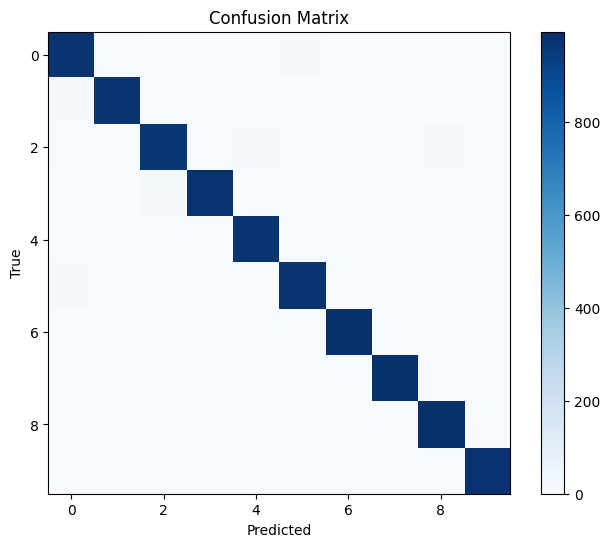

In [10]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


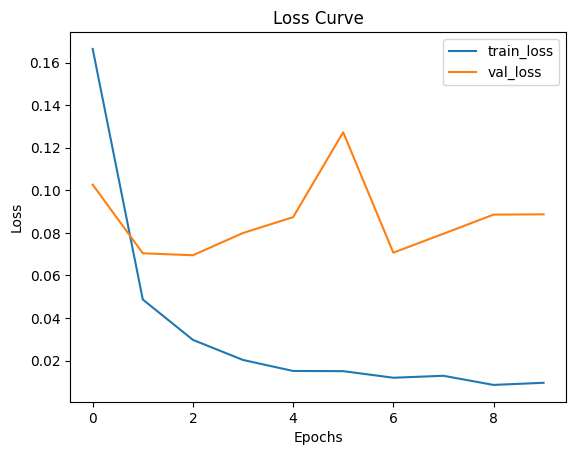

In [11]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


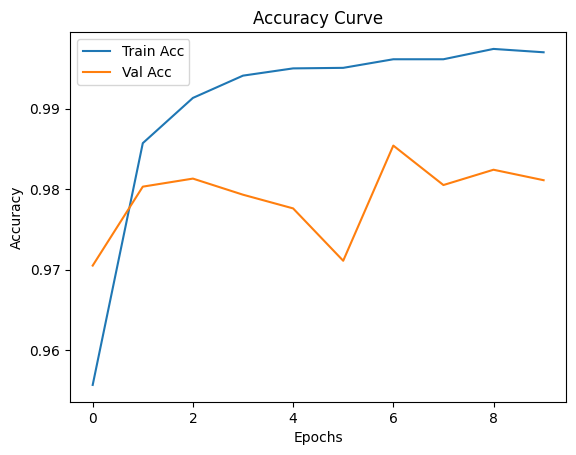

In [ ]:
# Plotting training and validation  Accuracy

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
